In [1]:
import xgboost as xgb 
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_target = df['SUBCLASS']

data = df.drop(columns=['ID', 'SUBCLASS'])
df_test.drop(columns=['ID'], inplace=True)
data

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,R895R,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [2]:
disease_list = df.SUBCLASS.unique()
disease_list

array(['KIPAN', 'SARC', 'SKCM', 'KIRC', 'GBMLGG', 'STES', 'BRCA', 'THCA',
       'LIHC', 'HNSC', 'PAAD', 'OV', 'PRAD', 'UCEC', 'LAML', 'COAD',
       'ACC', 'LGG', 'LUSC', 'LUAD', 'CESC', 'PCPG', 'THYM', 'BLCA',
       'TGCT', 'DLBC'], dtype=object)

In [3]:
### ###
nCols = len(data.columns)
from collections import defaultdict
cDic = defaultdict()
for i, c in enumerate(data.columns):
    cDic[i] = c

In [4]:
def make_ndf (data, df_test):
    #data.drop('SUBCLASS', axis=1,inplace=True)
    #target = pd.concat([data,df_test])
    
    #2칸=>1칸
    ndf = pd.DataFrame()
    
    for i in range(nCols//2):
        ndf[cDic[i*2]] = total[total.columns[i*2]] +' '+ total[total.columns[(i*2+1)]]
    return ndf

In [5]:
diseaseList = df.SUBCLASS.value_counts().rename_axis('disease').reset_index(name='counts')
diseaseList

,disease,counts
0,BRCA,786
1,KIPAN,515
2,GBMLGG,461
3,STES,379
4,KIRC,334
5,THCA,324
6,SKCM,276
7,PRAD,266
8,OV,253
9,LGG,229


In [6]:
data

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,R895R,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [7]:
selected_genes = set()
for d in disease_list:
    df_ = data.copy()
    df_['SUBCLASS'] = df.loc[:, df.columns[1:2]]
    count_df = df_[df_.SUBCLASS==d].apply(lambda x : x!='WT').agg(sum)
    count_df = count_df[2:].reset_index(name='count')        
    num_transaction = diseaseList[diseaseList.disease == d]['counts'].values[0]
    th = 20 if num_transaction > 250 else 5
    #th = num_transaction//divider
    #print( num_transaction, th)
    
    gene_list = count_df[count_df['count']>th]['index'].values
    print(d, len(gene_list))
    selected_genes.update(gene_list)
print(len(selected_genes))

    

KIPAN 8
SARC 32
SKCM 372
KIRC 2
GBMLGG 13
STES 221
BRCA 25
THCA 2
LIHC 107
HNSC 334
PAAD 23
OV 2
PRAD 2
UCEC 2006
LAML 10
COAD 936
ACC 52
LGG 17
LUSC 587
LUAD 468
CESC 176
PCPG 4
THYM 2
BLCA 209
TGCT 15
DLBC 18
2226


In [8]:
if 'SUBCLASS' in selected_genes:
    print('ry')

ry


In [9]:
selected_genes.remove("SUBCLASS")

In [10]:
total = pd.concat([data,df_test] ) #make_ndf(data, df_test)
f = lambda x : '' if x == 'WT' else x
total = total.map(f)
#data = total[:6201]
total

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,,,,,,,,,,,...,,,,,,,,,,
1,,,,,,,,,,,...,,,,,,,,,,
2,R895R,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,,,,,,,,,,,...,,,,,,,,,,
2542,,,,,,,,,,,...,,,,,,,,,,
2543,,,,,,L217I,P221P P251P,R5M,G606D,I248Nfs,...,S2049Vfs S1909Vfs,L232R,,,L305L,,N252I N251I,G679V,,
2544,,,,,,,,,R1517H,,...,,,,,,,,,,


In [11]:

total = total.loc[:, list(selected_genes)]
total

,IL1RL2,SREBF2,ZNRF4,LRRC15,CHRNA5,IL1RL1,CDC5L,OAZ3,NIPBL,COL9A1,...,ACE,ARFGEF2,CEP192,ALDOB,LEF1,CCR7,CDH6,PRKCA,MSR1,RPL39
0,,,,,,,,,,,...,,,,,,,,,,
1,,,,,,,,,,,...,,,,,,,,,,
2,,,,,,,,,,,...,,,F1557F,,,,D691N,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,,,,,,,,,,,...,,,,,,,,,,
2542,,,,,,,,,,,...,,,,,,,,,,
2543,,,,,,,A93S,,S2165I,D294D D51D,...,L696P L1270P L1081P L655P L986P L475P,Q1776H,R1998M,,,,,,,
2544,,,,,,,,,,,...,,,,,,,,,,


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for c in total.columns:
    total[c] = encoder.fit_transform(total[c])



In [13]:
df = total[:6201]
df_test = total[6201:]



In [14]:
df

,IL1RL2,SREBF2,ZNRF4,LRRC15,CHRNA5,IL1RL1,CDC5L,OAZ3,NIPBL,COL9A1,...,ACE,ARFGEF2,CEP192,ALDOB,LEF1,CCR7,CDH6,PRKCA,MSR1,RPL39
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,53,0,0,0,28,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0,0,0,0,0,104,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,0,0,0,0,0,0,0,0,0,158,...,0,0,0,0,0,0,0,0,0,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_test

,IL1RL2,SREBF2,ZNRF4,LRRC15,CHRNA5,IL1RL1,CDC5L,OAZ3,NIPBL,COL9A1,...,ACE,ARFGEF2,CEP192,ALDOB,LEF1,CCR7,CDH6,PRKCA,MSR1,RPL39
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,49,0,0,0,62,0,0,0,...,0,228,0,0,0,0,160,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2543,0,0,0,0,0,0,12,0,230,10,...,93,152,141,0,0,0,0,0,0,0
2544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.preprocessing import LabelEncoder
X = df
y = df_target
encoder2 = LabelEncoder()
y = encoder2.fit_transform(y)
y


array([ 8, 19, 20, ...,  4, 22, 20])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=156)#shuffle=False,stratify = y, 
print(X_train.shape, X_test.shape)

(4340, 2225) (1861, 2225)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
# 기본설정 랜덤포레스트
rf = RandomForestClassifier(n_jobs=-1) # 모든 코어 사용

# 피쳐중요도만 확인할 것이기 때문에 fit만 한다.
rf.fit(X_train, y_train)



[2.04642970e-04 3.98592540e-04 2.79968136e-04 ... 3.50357354e-04
 7.54695079e-04 1.11667993e-05] 

BRAF      0.024510
IDH1      0.023938
VHL       0.018869
TP53      0.017451
PIK3CA    0.015645
APC       0.012221
PTEN      0.007453
ATRX      0.007118
NPM1      0.006901
GATA3     0.004682
CDH1      0.004532
CTNNB1    0.004399
RYR2      0.004140
PCLO      0.003976
EGFR      0.003961
dtype: float64


In [29]:
X


,IL1RL2,SREBF2,ZNRF4,LRRC15,CHRNA5,IL1RL1,CDC5L,OAZ3,NIPBL,COL9A1,...,ACE,ARFGEF2,CEP192,ALDOB,LEF1,CCR7,CDH6,PRKCA,MSR1,RPL39
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,53,0,0,0,28,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0,0,0,0,0,104,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,0,0,0,0,0,0,0,0,0,158,...,0,0,0,0,0,0,0,0,0,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=len(total.columns),                            n_informative=2, n_redundant=0,                           random_state=0, shuffle=False)
#clf = RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1)
clf = RandomForestClassifier(
    n_estimators=500,             # 트리의 개수 (너무 적으면 모델이 불안정하고, 너무 많으면 학습 시간이 오래 걸림)
    max_features='sqrt',          # 각 트리에서 선택할 피처의 수 (sqrt는 약 63개 피처를 사용, 피처가 많을 때 좋은 기본값)
    max_depth=None,               # 트리의 최대 깊이 (None이면 트리가 완전히 성장할 때까지 분할)
    min_samples_split=2,          # 노드를 분할하기 위한 최소 샘플 수 (default값)
    min_samples_leaf=1,           # 리프 노드에 있어야 하는 최소 샘플 수 (default값)
    bootstrap=True,               # 부트스트랩 샘플링을 사용할지 여부 (default는 True, 부트스트랩을 사용하면 트리 간의 다양성을 증가)
    n_jobs=-1,                    # 가능한 모든 CPU 코어를 사용하여 학습 (병렬 처리)
    random_state=42,              # 재현성을 위해 랜덤 시드 설정
    class_weight='balanced',      # 데이터 불균형일 경우 자동으로 가중치 조정
    verbose=1                     # 학습 과정에서 출력 메시지 (진행 상황을 확인할 수 있음)
    )
    
clf.fit(X, y) 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.7s finished


RandomForestClassifier(class_weight='balanced', n_estimators=500, n_jobs=-1,
                       random_state=42, verbose=1)

In [ ]:
# 그냥 확인하기에 피쳐종류가 30개나 되어 한눈에 들어오지 않는다.
print(rf.feature_importances_, '\n')

# 시리즈로 만들어 인덱스를 붙인다
ser = pd.Series(rf.feature_importances_, index=X_train.columns)  

# 내림차순 정렬을 이용한다
top15 = ser.sort_values(ascending=False)[:15]
print(top15)


[2.04642970e-04 3.98592540e-04 2.79968136e-04 ... 3.50357354e-04
 7.54695079e-04 1.11667993e-05] 

BRAF      0.024510
IDH1      0.023938
VHL       0.018869
TP53      0.017451
PIK3CA    0.015645
APC       0.012221
PTEN      0.007453
ATRX      0.007118
NPM1      0.006901
GATA3     0.004682
CDH1      0.004532
CTNNB1    0.004399
RYR2      0.004140
PCLO      0.003976
EGFR      0.003961
dtype: float64


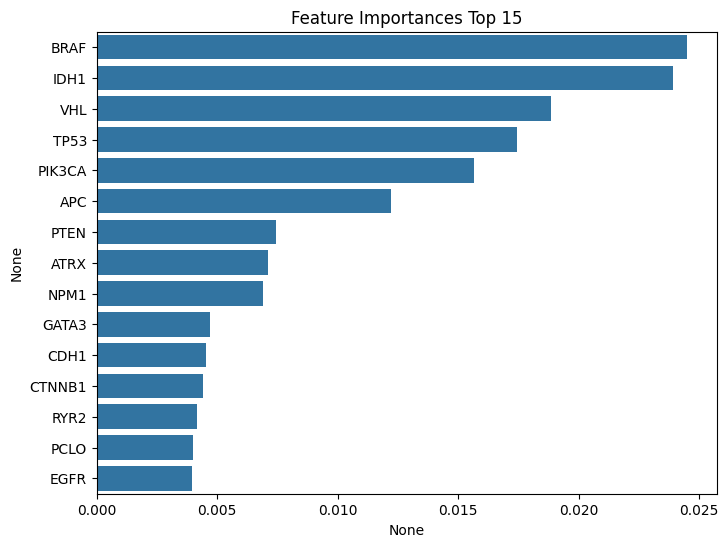

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15')
sns.barplot(x=top15, y=top15.index)
plt.show()

In [25]:
dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)


#Multi-class classification

In [26]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    'num_class': 26
}
num_boost_round = 50

dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round , early_stopping_rounds=5, 
                  evals=[(dtrain, 'train'), (dtest, 'valid')],
                  verbose_eval=2)

[0]	train-mlogloss:2.60293	valid-mlogloss:2.69755
[2]	train-mlogloss:2.20731	valid-mlogloss:2.44130
[4]	train-mlogloss:1.97886	valid-mlogloss:2.32125
[6]	train-mlogloss:1.81556	valid-mlogloss:2.25656
[8]	train-mlogloss:1.69278	valid-mlogloss:2.21073
[10]	train-mlogloss:1.59819	valid-mlogloss:2.18025
[12]	train-mlogloss:1.51877	valid-mlogloss:2.15542
[14]	train-mlogloss:1.45598	valid-mlogloss:2.14387
[16]	train-mlogloss:1.40049	valid-mlogloss:2.13533
[18]	train-mlogloss:1.35238	valid-mlogloss:2.12888
[20]	train-mlogloss:1.31167	valid-mlogloss:2.12783
[22]	train-mlogloss:1.27326	valid-mlogloss:2.12530
[24]	train-mlogloss:1.24013	valid-mlogloss:2.12342
[26]	train-mlogloss:1.20963	valid-mlogloss:2.12298
[28]	train-mlogloss:1.18230	valid-mlogloss:2.12334
[30]	train-mlogloss:1.15579	valid-mlogloss:2.12514
[32]	train-mlogloss:1.13083	valid-mlogloss:2.12296


In [27]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    'learning_rate': 0.05
}
num_boost_round = 200

clf = xgb.XGBClassifier(n_estimators=num_boost_round, early_stopping_rounds=5, **params) 
clf.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test,y_test)],
        verbose=2);

[0]	validation_0-mlogloss:3.13666	validation_1-mlogloss:3.15252
[2]	validation_0-mlogloss:2.95538	validation_1-mlogloss:2.99972
[4]	validation_0-mlogloss:2.81696	validation_1-mlogloss:2.88792
[6]	validation_0-mlogloss:2.70355	validation_1-mlogloss:2.79913
[8]	validation_0-mlogloss:2.60821	validation_1-mlogloss:2.72788
[10]	validation_0-mlogloss:2.52564	validation_1-mlogloss:2.66731
[12]	validation_0-mlogloss:2.45245	validation_1-mlogloss:2.61619
[14]	validation_0-mlogloss:2.38666	validation_1-mlogloss:2.57219
[16]	validation_0-mlogloss:2.32694	validation_1-mlogloss:2.53324
[18]	validation_0-mlogloss:2.27237	validation_1-mlogloss:2.49867
[20]	validation_0-mlogloss:2.22244	validation_1-mlogloss:2.46824
[22]	validation_0-mlogloss:2.17654	validation_1-mlogloss:2.44050
[24]	validation_0-mlogloss:2.13334	validation_1-mlogloss:2.41588
[26]	validation_0-mlogloss:2.09374	validation_1-mlogloss:2.39303
[28]	validation_0-mlogloss:2.05669	validation_1-mlogloss:2.37277
[30]	validation_0-mlogloss:2.0

In [34]:
y_true = y_test
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
y_true.shape, y_pred.shape, y_score.shape

((1861,), (1861,), (1861, 26))

In [52]:
from sklearn import metrics 
metrics.accuracy_score(y_true, y_pred)

0.34712520150456744

In [35]:
from sklearn import metrics 
metrics.accuracy_score(y_true, y_pred)

0.1477700161203654

In [36]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        35
           2       0.13      0.99      0.23       238
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00       150
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00       159
           9       0.00      0.00      0.00       104
          10       0.00      0.00      0.00        48
          11       0.00      0.00      0.00        57
          12       0.00      0.00      0.00        48
          13       0.00      0.00      0.00        59
          14       0.00      0.00      0.00        49
          15       0.00      0.00      0.00        93
          16       0.00      0.00      0.00        28
          17       0.00    

In [34]:
metrics.roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')

0.8540263969410469

In [38]:
metrics.roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')

0.8388535651804083

In [46]:
clf.predict(df_test)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.2s finished


array([21, 25,  2, ..., 20, 10,  6])

In [47]:
res = clf.predict(df_test)



[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


In [48]:
res = encoder2.inverse_transform(res)

In [49]:

df_test1 = pd.read_csv('test.csv')
res_df = pd.DataFrame ({'ID' : df_test1['ID'], 'SUBCLASS' : res})
res_df


,ID,SUBCLASS
0,TEST_0000,STES
1,TEST_0001,UCEC
2,TEST_0002,BRCA
3,TEST_0003,LGG
4,TEST_0004,LUAD
...,...,...
2541,TEST_2541,COAD
2542,TEST_2542,HNSC
2543,TEST_2543,SKCM
2544,TEST_2544,LAML


In [50]:
res_df.to_csv('res09-2.csv',index = False)

In [97]:
pred_probs = xgb_model.predict(dtest)


NameError: name 'xgb_model' is not defined

In [ ]:
import numpy as np
print(np.round(pred_probs[:10], 3))


In [58]:
preds= [round(x) if x > 0 else 0 for x in pred_probs]

In [ ]:
preds

In [60]:
for p in preds:
    if p<0:
        print(p)


In [ ]:
encoder.inverse_transform(preds)

In [35]:
model = RandomForestClassifier(
            n_estimators=50, ## 붓스트랩 샘플 개수 또는 base_estimator 개수
            criterion='entropy', ## 불순도 측도
            max_depth=65, ## 개별 나무의 최대 깊이
            #max_features='sqrt', ## 매 분리시 랜덤으로 뽑을 변수 개수
            #max_samples=1.0, ## 붓스트랩 샘플 비율 => 1이면 학습데이터를 모두 샘플링한다.
            #bootstrap=True, ## 복원 추출,  False이면 비복원 추출
            oob_score=True, ## Out-of-bag 데이터를 이용한 성능 계산
            random_state=100
).fit(X,y)


In [ ]:
## 예측
print(model.predict(X)[:3]) 
print()


In [ ]:
X[:3]

In [ ]:
## 성능 평가
print(model.oob_score_) ## Out-of-bag 성능 평가 점수
print('정확도 : ', model.score(X,y)) ## 테스트 성능 평가 점수(Accuracy)
print()
## 변수 중요도
print(model.feature_importances_)




In [ ]:
## 성능 평가
print(model.oob_score_) ## Out-of-bag 성능 평가 점수
print('정확도 : ', model.score(X,y)) ## 테스트 성능 평가 점수(Accuracy)
print()
## 변수 중요도
print(model.feature_importances_)




In [ ]:
res = model.predict(df_test)
res

In [ ]:
res = model.predict(df_test)
res

In [ ]:
df_test1 = pd.read_csv('test.csv')
res_df = pd.DataFrame ({'ID' : df_test1['ID'], 'SUBCLASS' : res})
res_df



In [24]:
res_df.to_csv('res04.csv',index = False)

In [ ]:
df[df.SUBCLASS == 'BRCA'].sum().sort_values(ascending=False).str.replace('WT','')

In [ ]:
df[df['SUBCLASS']=='DLBC']

In [ ]:
import numpy as np 
dfs = df[df['SUBCLASS']=='DLBC']
dfs.columns

In [ ]:
for c in dfs.columns:
    dfs[c] = np.where(dfs[c] == 'WT', 0, 1)
dfs

    

In [ ]:
dfs = df[df['SUBCLASS']=='DLBC']
dfs.apply(lambda x: x(if x=='WT' else x=1))

In [ ]:
for  x in df.iloc[0]:
    if x != 'WT': print(x)


In [ ]:
len(df_test.columns)

In [ ]:
len(df_test)

In [ ]:
df.colu